## Section One: GeoSpatial Data Processing

In this section, you will implement a pipeline to generate a time series of vegetation indices for a
given Area of Interest (AOI). The vegetation indices we will be looking at are the NDWI and the
MSI.


#### Objective:
Given:
- An AOI (given as GeoJSON).
- A vegetation index.
- A start and end date.

You must produce a **GeoTIFF file**, where:
- Each band corresponds to the selected vegetation index computed at a specific
acquisition date within the requested date range.
- The output GeoTIFF should have the same CRS as the input GeoJSON.


#### Requirements:
- We advise using Sentinel-2, but Landsat will also be accepted. **Important**: Clearly
explain your choice of data **preprocessing level** (e.g., Level-1C, Level-2A for
Sentinel-2, or L1/L2 for Landsat).
- You are free to choose the API, library, or provider you want. **Important**: Explain your
choice of API/provider and discuss its advantages and drawbacks.
- You are not expected to submit the generated GeoTIFFs. We will test your code by
running it against different AOIs and date ranges.


In [1]:
from datetime import datetime
import json

## Which preprocessing level to use ?

I have chosen to use Sentinel-2 L2A level. From what I understand it is L1C data which is processed with atmospheric correction. It is well adapted for our section 1 task which is to retrieve vegetation indexes as well as for section 2 and 3 land segmentation.

L1C can be useful for people who need to do their own preprocess of the atmosphere but it requires a deep understanding of cloud removal and atmospheric condition I don't yet have. Given the time and goals of this case study L2A fits perfectly.

I also got the impression that most datasets/pretrained models available on the internet are from L2A level which seems to be the most common to use with Sentinel 2

**Sources :**

https://gis.stackexchange.com/questions/385975/should-i-always-choose-sentinel-2-atmospheric-corrected-imagery

https://forum.step.esa.int/t/clarification-on-difference-between-l1c-and-l2a-data/24940/6

## Which API/provider to use

I have chosen **sentinelhub** which seems to be a very common API. It has a python libray and a web interface (EO browser) which is very useful to rapidly display examples, understand how it works and compare/verify the outputs of our script. It seems to be similar to the official ESA portal (Copernicus Open Access Hub, SciHub) but apparently it is faster and more adapted for developers. 

One main drawback for Sentinelhub is that it has a 30 days free tier with a limited number of requests whereas scihub is free and full data may be stored longer on ESA portal.

To conclude, Sentinel Hub is well-suited for this case study, but if I were to work on a similar project for a longer period I might need to switch to Copernicus Hub

Others : 
- Google Earth Engine
- Planetary Computer


**Sources :**

https://docs.sentinel-hub.com/api/latest/data/

https://sentinelhub-py.readthedocs.io/en/latest/examples/data_collections.html

https://sentiwiki.copernicus.eu/web/s2-applications

### Définition des paramètres

In [ ]:
start_date = datetime(2024, 8, 30).strftime("%Y-%m-%d")
end_date = datetime(2024, 9, 30).strftime("%Y-%m-%d")
cloud_cover_limit = 20

#Choose from ndvi, evi, gndvi, ndre, savi, arvi
vegetation_index = 'ndvi'

AOI_path = '../AOI_Rubicon.geojson'
with open(AOI_path, 'r') as file:
    geojson_data = json.load(file)["features"][0]["geometry"]


### Génération du fichier geotiff pour l'index de végétation voulu

Remarque : Dans la fonction geotiff_for_veg_index si l'image est trop grande par rapport au maximum de sentinelhub (2500\*2500 pixels) j'ai diminué la résolution pour que l'image est une taille 2500\*W

In [4]:
from rubicon_cs.main import geotiff_for_veg_index

#Do not forget to update your .env file with client id and secret for sentinel hub (see .env.example file)
geotiff_for_veg_index(AOI=geojson_data, date_range=(start_date, end_date), veg_index=vegetation_index, cloud_cover_limit=cloud_cover_limit)

/home/mathieujayet/code/matjayet/rubicon/rubicon-case-study/src/rubicon_cs/main.py:74: SHDeprecationWarning: The string representation of `BBox` will change to match its `repr` representation.
  print(f"Bounding Box: {bounds}")


Bounding Box: 5.429163466084987,45.50223271109695,7.127353602241698,46.13806674872461


### Affichage du geotiff

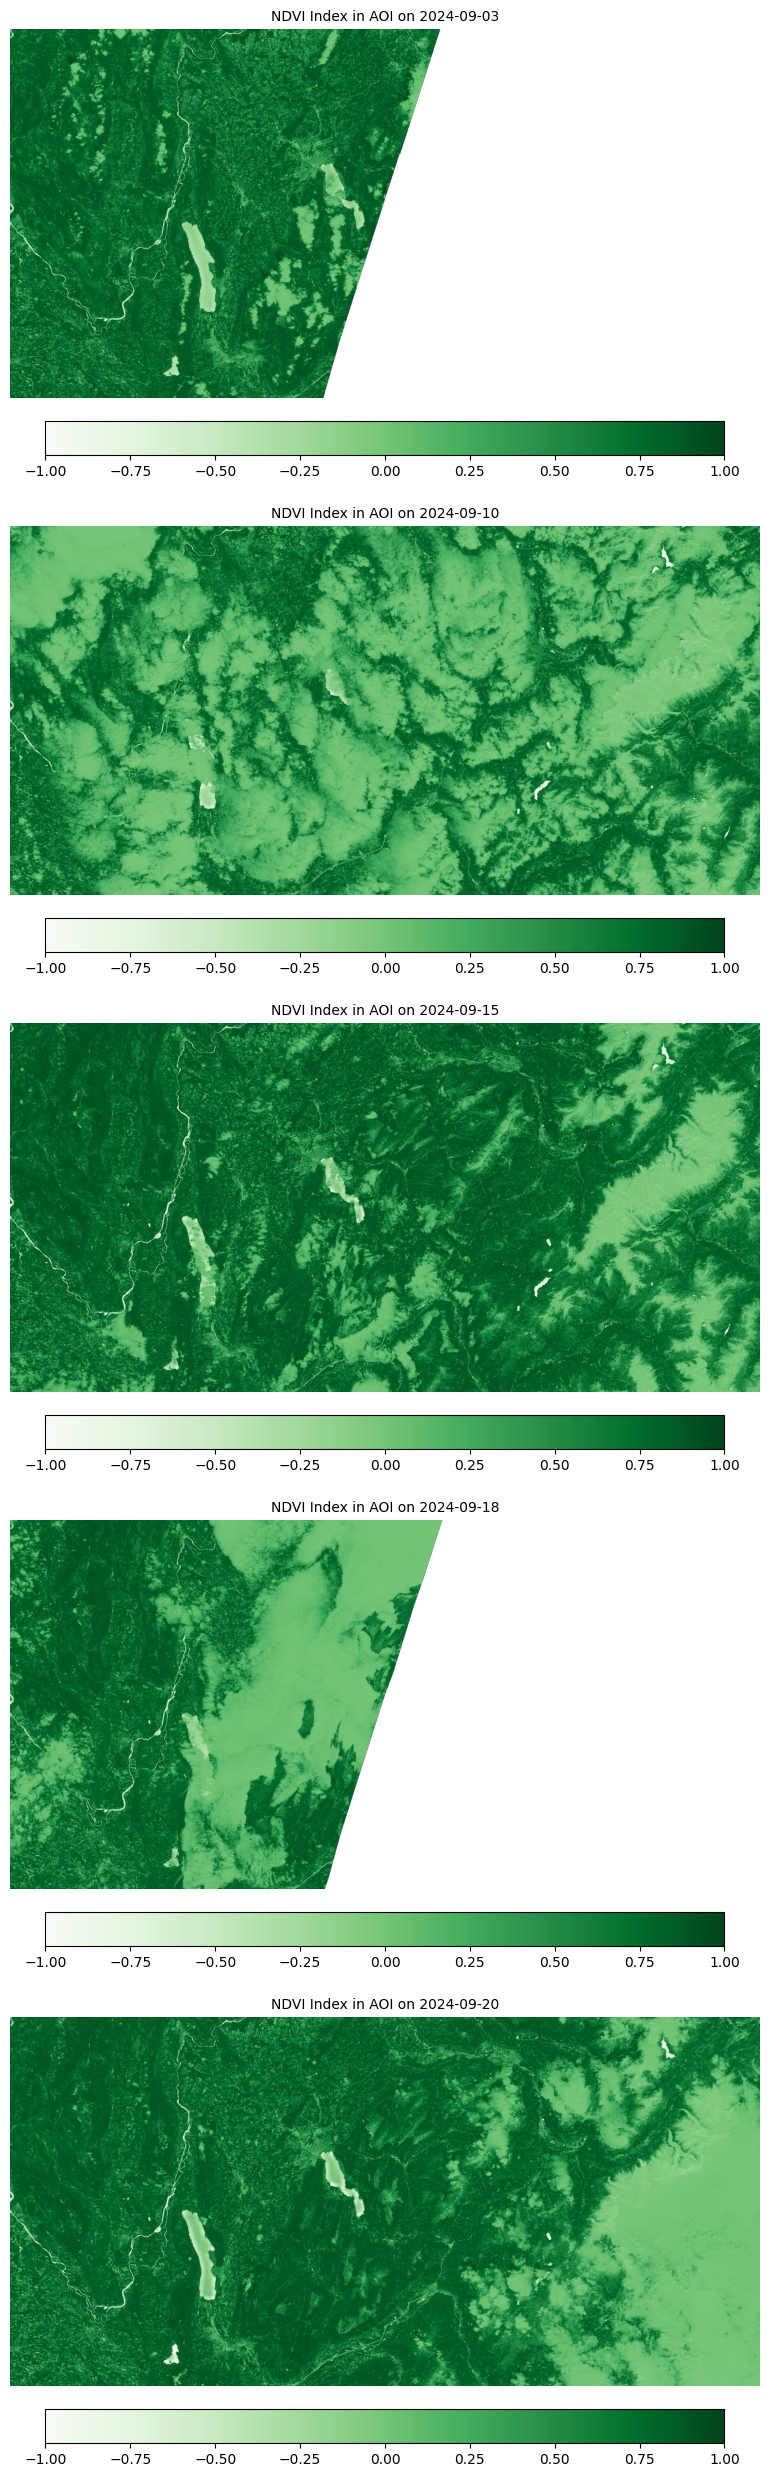

In [6]:
from rubicon_cs.utils import display_geotiff

display_geotiff(f'outputs/section_1/{start_date}_{end_date}_{vegetation_index}.tif', ncols=1, cmap='Greens')